# SPRINT4　SVM



### SVMとは

データの間にそれらを分離する線（面）を引いて分類する手法。  
その線 （面）に最も近いデータ（サポートベクトル）から可能な限り遠くなるように引くことで  
未学習のデータでも高精度に分類できるようにしている。

### SVMにおけるカーネルとは

元の次元では分離できないデータを高次元に非線形写像するために用いる関数のこと  
以下のカーネルがよく用いられる  
・RBF(動径基底関数、ガウス関数)  
・多項式  
・シグモイド

### 線形回帰やロジスティック回帰との比較

・SVMは線形問題だけでなく、カーネルにRBFや多項式などを用いることで非線形問題にも対応可能  
・SVMにおいて学習結果に影響を与えるのは分離線（面）に近い点（サポートベクター）であるため、  
　訓練データに外れ値が含まれていてもその影響を受けにくい


##  乳がん（良性、悪性）の分類問題への適用

### データ・セットの用意

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("./sprint4/wdbc.data",header=None)

## EDA

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



今回のデータは複数枚撮影された乳がんの検査写真であり、その画像の特徴量が１０個あり、
それぞれの特徴量の平均、標準誤差、大きいものや悪いものの上位３つの平均をそれぞれ算出したもの。

目的変数は(M = malignant, B = benign)であり、2クラス分類問題となる。

それぞれの特徴量をラベリングする。

In [4]:
col_name =['radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points',\
           'symmetry','fractal_dimension']

col_name2 = ['_mean', '_ste', '_w_or_l']

columns_dict = {0:'id', 1:'target'}

count = 2
for col2 in col_name2:
    for col in col_name:
        columns_dict[count]= col + col2
        count+=1
columns_dict

{0: 'id',
 1: 'target',
 2: 'radius_mean',
 3: 'texture_mean',
 4: 'perimeter_mean',
 5: 'area_mean',
 6: 'smoothness_mean',
 7: 'compactness_mean',
 8: 'concavity_mean',
 9: 'concave_points_mean',
 10: 'symmetry_mean',
 11: 'fractal_dimension_mean',
 12: 'radius_ste',
 13: 'texture_ste',
 14: 'perimeter_ste',
 15: 'area_ste',
 16: 'smoothness_ste',
 17: 'compactness_ste',
 18: 'concavity_ste',
 19: 'concave_points_ste',
 20: 'symmetry_ste',
 21: 'fractal_dimension_ste',
 22: 'radius_w_or_l',
 23: 'texture_w_or_l',
 24: 'perimeter_w_or_l',
 25: 'area_w_or_l',
 26: 'smoothness_w_or_l',
 27: 'compactness_w_or_l',
 28: 'concavity_w_or_l',
 29: 'concave_points_w_or_l',
 30: 'symmetry_w_or_l',
 31: 'fractal_dimension_w_or_l'}

In [5]:
train_df = train_df.rename(columns=columns_dict)
train_df.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_w_or_l,texture_w_or_l,perimeter_w_or_l,area_w_or_l,smoothness_w_or_l,compactness_w_or_l,concavity_w_or_l,concave_points_w_or_l,symmetry_w_or_l,fractal_dimension_w_or_l
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


ヒートマップ作成（特徴量間の相関を確認する）

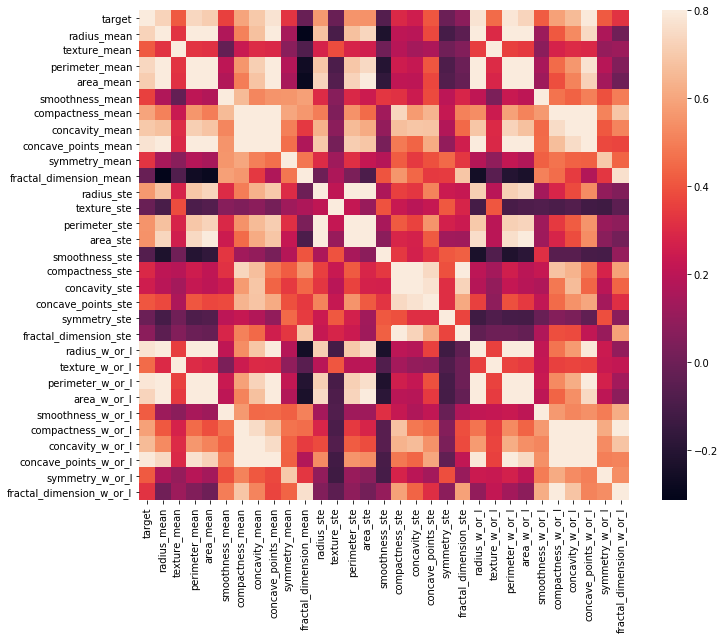

In [7]:
# 相関行列
eda_df = train_df
eda_df = eda_df.drop('id', axis=1)
eda_df['target'] = eda_df['target'].map({'M': 1, 'B': 0})

corr_matrix = eda_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

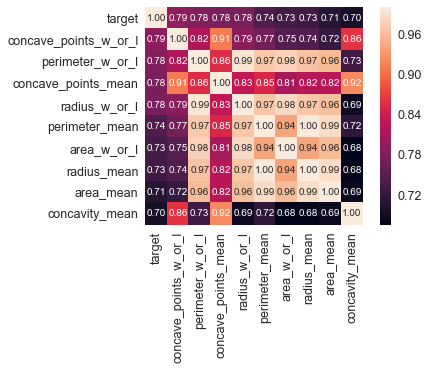

In [8]:
col_check = corr_matrix.nlargest(10, 'target')['target'].index

k =10 
# nlargest 大きい順にk個とる <->nsmallest 
cols = corr_matrix.nlargest(k, 'target')['target'].index
# 販売価格との相関係数が大きい順に10こ並べて、そのインデックスをcolsに代入　
cm = np.corrcoef(eda_df[cols].values.T)
# なぜ転置をとるのか http://lofas.hatenablog.com/entry/2015/02/09/150552
sns.set(font_scale=1.25) # 項目の名前のフォントを1.25倍する
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                 yticklabels=cols.values, xticklabels=cols.values)

半径、面積、周囲、凹みの大きさ、凹点（輪郭の凹部の数）が特に相関が高い  
また、物理的な大きさに加え、凹みの数や大きさも相関が高い

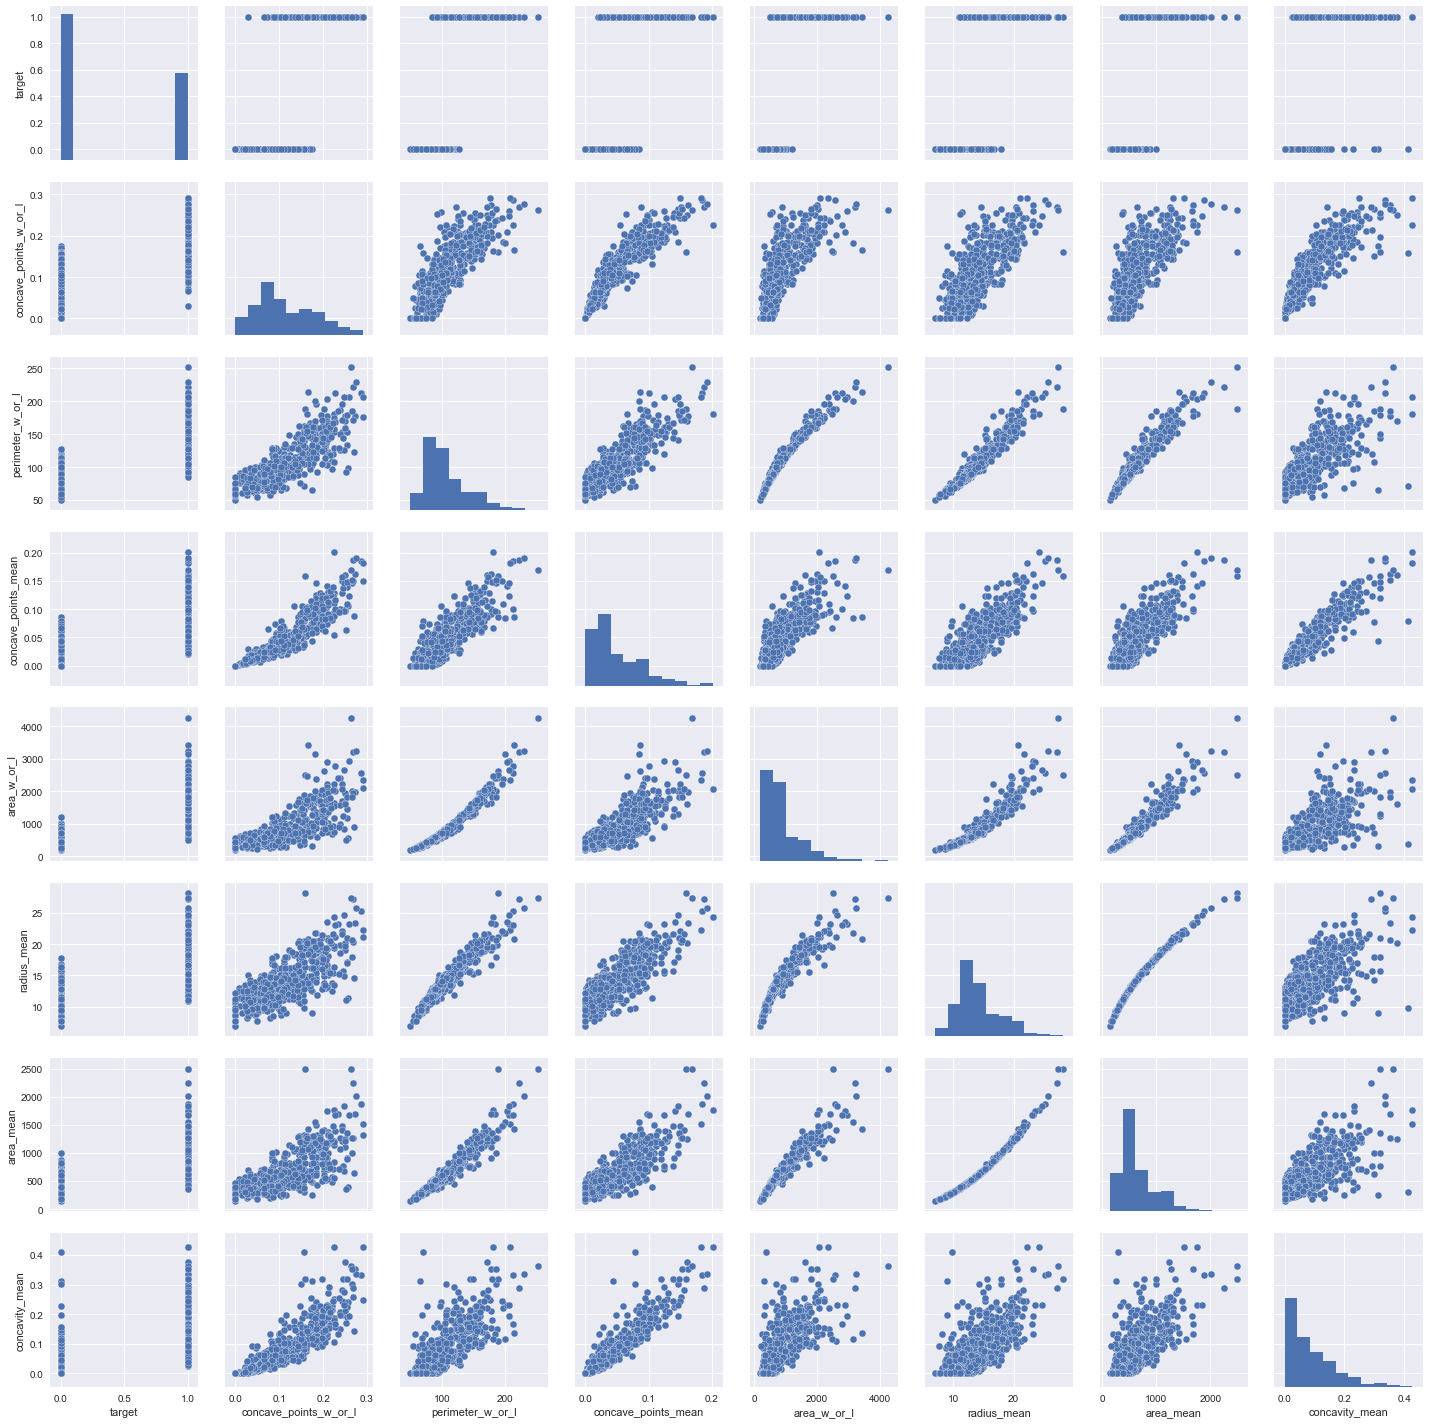

In [69]:
# 散布図
sns.set()
cols = ['target', 'concave_points_w_or_l', 'perimeter_w_or_l', 'concave_points_mean','area_w_or_l',\
        'radius_mean', 'area_mean', 'concavity_mean']
sns.pairplot(eda_df[cols], size=2.5)
plt.show();

特徴量間でも相関がみられるため、比較的分類がしやすいと予想される

In [70]:
# データ型と欠損値がないことを確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                          569 non-null int64
target                      569 non-null object
radius_mean                 569 non-null float64
texture_mean                569 non-null float64
perimeter_mean              569 non-null float64
area_mean                   569 non-null float64
smoothness_mean             569 non-null float64
compactness_mean            569 non-null float64
concavity_mean              569 non-null float64
concave_points_mean         569 non-null float64
symmetry_mean               569 non-null float64
fractal_dimension_mean      569 non-null float64
radius_ste                  569 non-null float64
texture_ste                 569 non-null float64
perimeter_ste               569 non-null float64
area_ste                    569 non-null float64
smoothness_ste              569 non-null float64
compactness_ste             569 non-null float64
concavity_ste   

説明変数の列を取り出す

In [71]:
y_df = train_df["target"]
y_df.unique()

array(['M', 'B'], dtype=object)

学習に不要な列を削除する

In [72]:
X_df = train_df.drop(["id","target"],axis=1)
X_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_w_or_l,texture_w_or_l,perimeter_w_or_l,area_w_or_l,smoothness_w_or_l,compactness_w_or_l,concavity_w_or_l,concave_points_w_or_l,symmetry_w_or_l,fractal_dimension_w_or_l
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [73]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                 569 non-null float64
texture_mean                569 non-null float64
perimeter_mean              569 non-null float64
area_mean                   569 non-null float64
smoothness_mean             569 non-null float64
compactness_mean            569 non-null float64
concavity_mean              569 non-null float64
concave_points_mean         569 non-null float64
symmetry_mean               569 non-null float64
fractal_dimension_mean      569 non-null float64
radius_ste                  569 non-null float64
texture_ste                 569 non-null float64
perimeter_ste               569 non-null float64
area_ste                    569 non-null float64
smoothness_ste              569 non-null float64
compactness_ste             569 non-null float64
concavity_ste               569 non-null float64
concave_points_ste          569 non-null float64
symmetry_ste 

学習データ標準化  
（特徴量間でスケールが異なると、スケールがより大きいものの影響を強く受けた学習結果になる。それを避けるためにスケールを統一する。）

In [74]:
X_std = (X_df - X_df.mean() ) / X_df.std()
X_std

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_w_or_l,texture_w_or_l,perimeter_w_or_l,area_w_or_l,smoothness_w_or_l,compactness_w_or_l,concavity_w_or_l,concave_points_w_or_l,symmetry_w_or_l,fractal_dimension_w_or_l
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.163619,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,-0.161215,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,-0.243975,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837


In [75]:
X_std.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_w_or_l,texture_w_or_l,perimeter_w_or_l,area_w_or_l,smoothness_w_or_l,compactness_w_or_l,concavity_w_or_l,concave_points_w_or_l,symmetry_w_or_l,fractal_dimension_w_or_l
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.136331e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.120470e-15,-1.074321e-15,-4.031144e-16,1.006030e-15,-1.888550e-15,4.860396e-16,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.033661e-15,-2.118204e-15,6.649631e-16,-1.795088e-16,-2.481734e-15,2.424930e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


### SVC  
サポートベクターマシンによる分類を実施

インスタンス作成

In [76]:
svc=svm.SVC()

データを訓練用とテスト用に分割する

In [77]:
X_train , X_test , y_train , y_test = train_test_split(X_std, y_df, test_size=0.2, random_state=0)

学習実施

In [78]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

テストデータに対して予測を実施

In [79]:
Y_pred = svc.predict(X_test)
Y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

予測結果をM(悪性)=1、B(良性)=0に変換

In [82]:
Y_pred_int = np.where(Y_pred == 'M', 1, 0)
Y_pred_int

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

正解データもM(悪性)=1、B(良性)=0に変換

In [83]:
y_test_array = np.array(y_test)
y_test_int =  np.where(y_test_array == 'M', 1, 0)

scikit learn にある accuracy, Recall, precision, F1_score 計算用クラスをインポート

In [81]:
import sklearn.metrics as skm

### accuracy
テストデータ全体における正答率
（上がスクラッチ、下がscikit learnによる計算）

In [84]:
(Y_pred == y_test).sum() / len(Y_pred)

0.9736842105263158

In [85]:
skm.accuracy_score(y_test_int, Y_pred_int)

0.9736842105263158

### Recall
本当に癌であるデータに対する正答率
（上がスクラッチ、下がscikit learnによる計算）

In [86]:
Recall = ( ((Y_pred=='M') & (y_test=='M')).sum() ) / (y_test=='M').sum()
Recall

0.9574468085106383

In [87]:
skm.recall_score(y_test_int, Y_pred_int)

0.9574468085106383

### precision
癌であると予測したデータの中での正答率（上がスクラッチ、下がscikit learnによる計算）


In [88]:
precision = ( ((Y_pred=='M') & (y_test=='M')).sum() )  / (Y_pred=='M').sum()
precision

0.9782608695652174

In [89]:
skm.precision_score(y_test_int, Y_pred_int)

0.9782608695652174

### F1_score
この値が高い＝癌であるデータを見つける力が強いということ  
accuracyと異なり、癌ではないデータを見抜いた事例数が多くても高い値はとらない   
（上がスクラッチ、下がscikit learnによる計算）

In [90]:
F1_score = (2 * Recall * precision) / (Recall + precision)
F1_score

0.967741935483871

In [91]:
skm.f1_score(y_test_int, Y_pred_int)

0.967741935483871

予測結果を確率値として出力させる

In [92]:
svc=svm.SVC(probability=True)
svc.fit(X_train,y_train)
pred_prob = svc.predict_proba(X_test)
pred_B, pred_M = pred_prob[:, 0], pred_prob[:, 1]

In [95]:
pred_M

array([9.99993177e-01, 3.08005215e-02, 1.72991186e-03, 2.07332765e-02,
       1.23231004e-03, 1.26689675e-03, 9.87063057e-04, 1.44758787e-03,
       1.26789249e-02, 2.57854096e-03, 2.62505066e-01, 4.01461460e-02,
       4.24882269e-04, 5.61758286e-01, 2.55623570e-01, 9.70751555e-01,
       3.79220796e-02, 9.99999903e-01, 9.93854824e-01, 9.99995224e-01,
       9.92611707e-01, 9.94353271e-01, 3.90003720e-03, 7.35763483e-04,
       9.99982659e-01, 1.42924553e-03, 2.31474891e-03, 9.89145620e-01,
       2.41689784e-03, 9.99999990e-01, 1.72307650e-03, 9.99998829e-01,
       1.03986339e-01, 9.99998021e-01, 3.03314751e-03, 9.99996463e-01,
       8.27710104e-03, 9.99998638e-01, 5.11276641e-03, 9.99998338e-01,
       8.10135175e-01, 1.40209889e-03, 9.20394024e-01, 5.73254790e-04,
       1.21777311e-01, 9.96170256e-01, 2.62505625e-03, 1.09050803e-02,
       1.66266478e-03, 9.99997809e-01, 8.43101861e-01, 9.59267649e-01,
       9.99999998e-01, 1.45870265e-03, 8.02235204e-04, 1.13982354e-03,
      

ROC曲線をスクラッチで作成

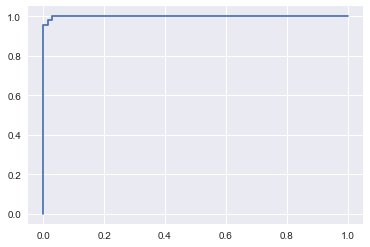

In [97]:
true_positive_point = []
false_positive_point = []
for i in range(101):
    threshold = 1 - i * 0.01
    true_positive_point.append( ( ((pred_M > threshold) & (y_test=='M')).sum() )  / (y_test=='M').sum())
    false_positive_point.append(( ((pred_M > threshold) & (y_test=='B') ).sum() )  / (y_test=='B').sum())
    
plt.plot(false_positive_point,true_positive_point)

plt.show()

AUCの値をスクラッチで計算

In [98]:
auc_area = 0
for i in range(100):
    width = false_positive_point[i+1] - false_positive_point[i]
    height = true_positive_point[i]
    auc_area+= width * height
    
print(auc_area)

0.9990473166084473


AUCの値をscikit learnのメソッドを使って計算

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_int, pred_M)

0.9990473166084471

ROC曲線をscikit learn のメソッドを使って作成

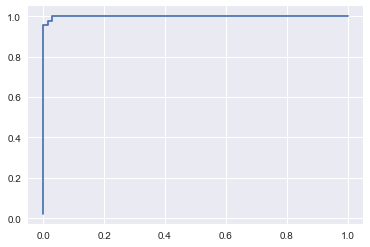

In [100]:
from sklearn.metrics import roc_curve

fpr, tpr , _ = roc_curve(y_test_int, pred_M)

plt.plot(fpr, tpr)

## ロジスティック回帰の適用



In [120]:
from sklearn.linear_model import LogisticRegression

y_train_array = np.array(y_train)
y_train_int =  np.where(y_train_array == 'M', 1, 0)


c_params = [1.0, 10.0, 100.0, 1000.0]

for i,c in enumerate(c_params):
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train_int)
    
    Y_pred_lr = lr.predict(X_test)
    print("Logistic Regression C= {}".format(c))
    print("accuracy : {}".format(skm.accuracy_score(y_test_int,  Y_pred_lr)))
    print("recall : {}".format(skm.recall_score(y_test_int, Y_pred_lr)))
    print("precision : {}".format(skm.precision_score(y_test_int, Y_pred_lr)))
    print("auc : {}".format(roc_auc_score(y_test_int, Y_pred_lr)))
    print('----------------------')


Logistic Regression C= 1.0
accuracy : 0.9649122807017544
recall : 0.9574468085106383
precision : 0.9574468085106383
auc : 0.9637980311209908
----------------------
Logistic Regression C= 10.0
accuracy : 0.956140350877193
recall : 0.9574468085106383
precision : 0.9375
auc : 0.9563353445538266
----------------------
Logistic Regression C= 100.0
accuracy : 0.9473684210526315
recall : 0.9574468085106383
precision : 0.9183673469387755
auc : 0.9488726579866625
----------------------
Logistic Regression C= 1000.0
accuracy : 0.9473684210526315
recall : 0.9574468085106383
precision : 0.9183673469387755
auc : 0.9488726579866625
----------------------


今回はSVCの結果の方が正確だった

### 交差検証、パラメータチューニング

ペナルティの値とカーネル関数を複数用意してグリッドサーチを行ったところ     
C=100, linearカーネルを設定するのが最良という結果となった

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
params = [{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],\
                                                     'kernel':['rbf']}]

#### GridSearchCVを使用する（デフォルトでCross Validation が３回行われる）

In [105]:
svm_grid = GridSearchCV(svm.SVC(),params,scoring='recall')

In [106]:
y_df_int = np.where(y_df == 'M', 1, 0)

In [107]:
svm_grid.fit(X_std, y_df_int)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

#### 最良の結果が出た時のパラメータ構成

In [108]:
svm_grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
grid_result = svm_grid.grid_scores_

/Users/kzfm/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


各パラメータ構成でのスコア

In [110]:
grid_result

[mean: 0.94818, std: 0.03310, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.94822, std: 0.02885, params: {'C': 10, 'kernel': 'linear'},
 mean: 0.95293, std: 0.02385, params: {'C': 100, 'kernel': 'linear'},
 mean: 0.93882, std: 0.04031, params: {'C': 1000, 'kernel': 'linear'},
 mean: 0.84455, std: 0.04956, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.31629, std: 0.05937, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.92471, std: 0.04639, params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.85395, std: 0.04297, params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.94348, std: 0.03030, params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.92471, std: 0.04639, params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.94822, std: 0.02885, params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.94348, std: 0.03030, params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}]

### SVMのスクラッチ実装、クラス化

svm.py
と実際に動かすコードをmain.pyに記述。